In [1]:
#importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
from lmfit import Model
from matplotlib.ticker import MultipleLocator, AutoLocator
mlp.style.use("classic") #giving a specified style to a plot

[[Model]]
    Model(ffit, prefix='V_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24367
    # data points      = 83
    # variables        = 20
    chi-square         = 4349.13945
    reduced chi-square = 69.0339595
    Akaike info crit   = 368.588091
    Bayesian info crit = 416.964904
[[Variables]]
    V_a1:      1.07783429 +/- 0.17792287 (16.51%) (init = 1.16)
    V_tmax1:   6.137 (fixed)
    V_rise1:   4.62585474 +/- 0.35342455 (7.64%) (init = 7.9)
    V_decay1:  30.6341404 +/- 8.47444445 (27.66%) (init = 58.93)
    V_n1:      8.03883672 +/- 5.05536930 (62.89%) (init = 1.02)
    V_a2:      1.09913213 +/- 1.00674159 (91.59%) (init = 1.02)
    V_tmax2:   22.2343 (fixed)
    V_rise2:   1.32513223 +/- 2.11185629 (159.37%) (init = 1.94)
    V_decay2:  5.19675250 +/- 9.44769412 (181.80%) (init = 7.61)
    V_n2:      0.98971351 +/- 2.97766525 (300.86%) (init = 2.05)
    V_a3:      1.31803461 +/- 0.47369427 (35.94%) (init = 1.07)
    V_tmax3:   34.1866 (fi

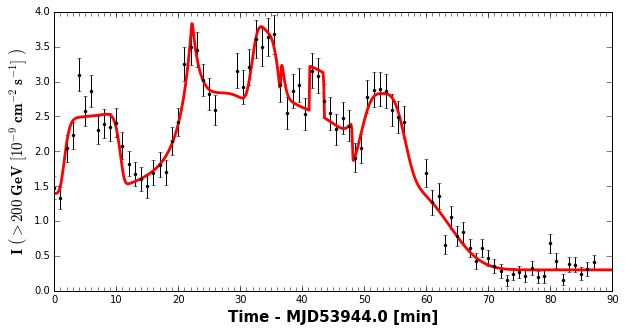

In [4]:
#reading data from a .txt file
t, flux, flux_err = np.loadtxt("/home/mher/Desktop/data for PKS 2155-304.txt",unpack=True)

#changing data for adapting axis scales
flux = flux *10**9
flux_err = flux_err*10**9
t = (t - 53944.02568281) * 86400/60 #to return minutes, instead of MJDs

#definig a functions which will fit the data 

def ffit(t,a1,tmax1,rise1,decay1,n1,a2,tmax2,rise2,decay2,n2,a3,tmax3,rise3,decay3,n3,a4,tmax4,rise4,
        decay4,n4,a5,tmax5,rise5,decay5,n5):
    
    return 0.3+a1*np.exp(-(abs(t-tmax1)/rise1)**n1)+a1*np.exp(-(abs(t-tmax1)/decay1)**n1)+a2*np.exp(-(abs(t-tmax2)/rise2)**n2)+a2*np.exp(-(abs(t-tmax2)/decay2)**n2)+a3*np.exp(-(abs(t-tmax3)/rise3)**n3)+a3*np.exp(-(abs(t-tmax3)/decay3)**n3)+a4*np.exp(-(abs(t-tmax4)/rise4)**n4)+a4*np.exp(-(abs(t-tmax4)/decay4)**n4)+a5*np.exp(-(abs(t-tmax5)/rise5)**n5)+a5*np.exp(-(abs(t-tmax5)/decay5)**n5)





#plotting

fig, ax = plt.subplots(figsize = (10,5)) #configuring figure size

#creating error graph of our data 

plt.errorbar(t,flux, yerr =flux_err, fmt = ".-", ecolor="k", elinewidth=1.002,ls = ":", lw = 0, color= "k", capsize=1.98)



# configuring y axis
plt.ylim(0,4)
ytext = r'$ \mathbf {I\ \left(>200\ GeV\ [10^{-9}\ cm^{-2}\ s^{-1} ]\ \right)} $'
plt.ylabel(ytext, fontweight = "bold", fontsize = 15)

#configuring  x axis

xtext = "Time - MJD53944.0 [min]"
plt.xlabel(xtext, fontsize = 15, fontweight = "bold")
plt.xlim(0,90)
#configuring ticks

xminorlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(xminorlocator)
ax.tick_params(which = "major",length = 5.7 )
ax.tick_params(which = "minor", length = 3.9)

#implementing lmfit

fitmodel = Model(ffit,prefix='V_') #giving a fitting Model

#set up variables 
fitmodel.set_param_hint("a1",value = 1.16, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax1",value = 6.137, vary= False)
fitmodel.set_param_hint("rise1",value = 7.9, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay1",value = 58.93, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n1",value = 1.02, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a2",value = 1.02, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax2",value = 22.2343,vary= False)
fitmodel.set_param_hint("rise2",value = 1.94, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay2",value = 7.61, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n2",value = 2.05, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a3",value = 1.07, min = -np.inf, max = np.inf) #3.1
fitmodel.set_param_hint("tmax3",value = 34.1866, vary= False)
fitmodel.set_param_hint("rise3",value = 2.60, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay3",value = 8.84, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n3",value = 4.67, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a4",value = 0.49, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax4",value = 42.329, vary= False)
fitmodel.set_param_hint("rise4",value = 1.21, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay4",value = 4.86, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n4",value = 8.17, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a5",value = 0.86, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax5",value = 52.9857,vary= False)
fitmodel.set_param_hint("rise5",value = 3.43, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay5",value = 9.87, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n5",value = 5.12, min = -np.inf, max = np.inf)

params = fitmodel.make_params()

tx = np.linspace(0,90,800) #for giving more values to t data
result = fitmodel.fit(flux,params, t = t, nan_policy="propagate", weights=1/flux_err**2) #evaluate parameteres for fiting data.
#fitting plot
comps = result.eval_components(t=tx)
plt.plot(tx,comps["V_"], color = 'r', lw = 2.8)


print(result.fit_report(show_correl=False))
#plt.savefig("C:/Users/user/Desktop/LMFIT.pdf", dpi = 400)

plt.show()

